In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()


True

In [3]:
model = ChatOpenAI(model="gpt-5-nano")

In [4]:
# create a state

class LLMState(TypedDict):

    question: str
    answer: str

In [5]:
def llm_qa(state: LLMState) -> LLMState:

    # extract the question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question {question}'

    # ask that question to the LLM
    answer = model.invoke(prompt).content

    # update the answer in the state
    state['answer'] = answer

    return state

In [6]:
# create our graph

graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_qa', llm_qa)

# add edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile
workflow = graph.compile()

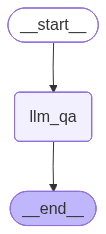

In [7]:
workflow

In [8]:
# execute

intial_state = {'question': 'How far is moon from the earth?'}

final_state = workflow.invoke(intial_state)

print(final_state['answer'])

About 384,400 kilometers (238,855 miles) on average.

Distance varies as the Moon orbits Earth:
- Perigee (closest): ~363,300 km (225,623 miles)
- Apogee (farthest): ~405,500 km (251,968 miles)

Light takes roughly 1.28 seconds to travel from the Moon to Earth.
